# Математические пакеты
## Лабороторная работа #1
Кодуков Александр 9382 в.7

In [315]:
import matplotlib.pyplot as plt
import numpy as np
import wave

spf = wave.open("./03-01-05-01-01-02-07_A7.wav", "r")

sample = spf.readframes(-1)
sample = np.fromstring(sample, "Int16")

(nChannels, sampWidth, sampleRate, nFrames, compType, compName) = spf.getparams()

C:\Users\akodu\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\akodu\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


### Построение огибающей

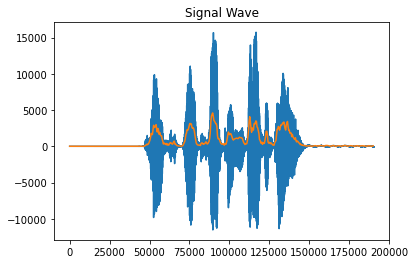

In [316]:
points = 500
interval_pts = len(sample) // points

res = []
res_x = [x for x in range(0, len(sample), interval_pts)]
res_x = res_x[0:points]
for pt in range(points):
    sum = 0
    for k in range(interval_pts * pt, interval_pts * (pt + 1) - 1):
        sum += abs(sample[k])
    sum /= interval_pts
    res += [sum]

plt.title("Signal Wave")
plt.plot(sample)
plt.plot(res_x, res)
plt.show()

### Фильтрация
Полосовой фильтр

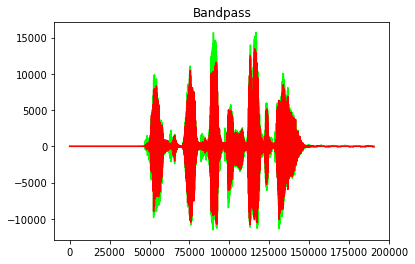

In [317]:
from scipy import signal

wn = 2 * 200 / sampleRate
wn2 = 2 * 3000 / sampleRate

b,a = signal.butter(5,[wn, wn2],'bandpass')
filtedData = signal.filtfilt(b,a,sample)
plt.title("Bandpass")
plt.plot(sample, color = '#00FF00')
plt.plot(filtedData, color='#FF0000')
plt.show()

from scipy.io import wavfile
wavfile.write("filtered.wav", freq_sample, filtedData.astype(np.int16))

import IPython
IPython.display.Audio(filtedData, rate=sampleRate)

### Детектор

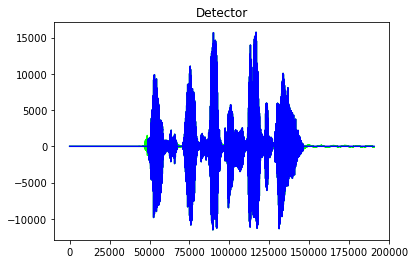

In [318]:
mid = 0

for x in sample:
    mid += abs(x)
mid /= len(sample)

detect = False

cnt_detect = 0
cnt_stop = 0

alpha = 0.5
Th = alpha * mid
k = 300
res = []

def checkDetect(cnt_detect):
    if cnt_detect > k:
        cnt_detect = 0
        return True

def checkStop(cnt_stop):
    if cnt_stop > k:
        cnt_stop = 0
        return False
    
for x in sample:
    if abs(x) > Th and not detect:
        cnt_detect += 1
        detect = checkDetect(cnt_detect)
    elif abs(x) < Th and detect:
        cnt_stop += 1
        detect = checkStop(cnt_stop)    
    if (detect):
        res.append(x)
    else:
        res.append(0)

plt.title("Detector")
plt.plot(sample, color = '#00FF00')
plt.plot(res, color = '#0000FF')
plt.show()

wavfile.write("detector.wav", sampleRate, np.array(res).astype(np.int16))

import IPython
IPython.display.Audio(res, rate=sampleRate)


В начале и в конце речи детектор работает правильно, но во время речи слышны помехи. Возможно, это связано с недостаточной точностью детектирования при использовании медианного значения сигнала целиком.

### Эхо

In [319]:
N = 8
alpha = [0.9 / (2 ** p) for p in range(N)]
gamma = 0.7
D = [int(8000 * (2 ** ((1 - i) / N))) for i in range (1, N + 1)]

signals = [[0] * len(sample)] * N
signals[0] = sample

res = [0] * len(sample)

for i in range(1, N):
    signals[i][D[i]:] = signals[0][0:(len(sample) - D[i])]
    res = np.add(res, signals[i])
    
wn = 2 * 10000 / sampleRate
b,a = signal.butter(5, wn,'lowpass')
filtedData = signal.filtfilt(b,a,res)

#res = sample
res = np.add(sample, [x * gamma for x in filtedData])

wavfile.write("reverb.wav", sampleRate, np.array(res).astype(np.int16))

import IPython
IPython.display.Audio(res, rate=sampleRate)

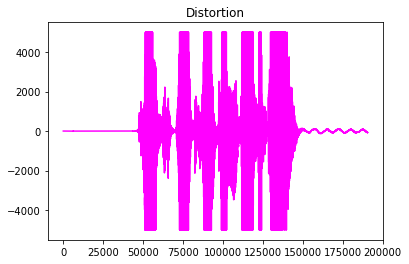

In [320]:
Th = 4000 #from detector
Max = 5000


res = sample

for i in range(len(res)):
    if abs(res[i]) > Th:
        res[i] = np.sign(res[i]) * Max

plt.title("Distortion")
plt.plot(res, color = '#FF00FF')
plt.show()

wavfile.write("distortion.wav", sampleRate, np.array(res).astype(np.int16))        
        
import IPython
IPython.display.Audio(res, rate=sampleRate)

В ходе выполнения работы были использованы на практике возможности математических пакетов Python для простейшей обработки звука, а также получены навыки работы с Jupyter Notebook